In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
reg_szn = pd.read_csv("./stephdata/Stephen_Curry_Regularseason_Stats.csv")
twentyone = reg_szn[reg_szn['Season_year'] == '2020-2021']
by_szn = reg_szn.groupby('Season_year').mean()
w_l_converted = twentyone['Result'].eq('W').mul(1)
twentyone['Result'] = w_l_converted
twentyone

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
698,2020-2021,Regular,Sun 5/16,MEM,1,113,101,40.0,16-36,16,...,5,6,83.3,7,9,1,1,2,7,46
699,2020-2021,Regular,Tue 5/11,PHX,1,122,116,37.0,7-22,7,...,6,6,100.0,3,6,0,1,2,3,21
700,2020-2021,Regular,Mon 5/10,UTA,1,119,116,37.0,11-25,11,...,11,12,91.7,4,6,0,2,1,3,36
701,2020-2021,Regular,Sat 5/8,OKC,1,136,97,29.0,14-26,14,...,10,10,100.0,5,2,0,1,2,1,49
702,2020-2021,Regular,Thu 5/6,OKC,1,118,97,31.0,11-21,11,...,6,7,85.7,4,7,0,1,2,3,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2020-2021,Regular,Fri 1/1,POR,0,98,123,34.0,9-20,9,...,4,4,100.0,8,5,0,0,1,1,26
757,2020-2021,Regular,Tue 12/29,DET,1,116,106,35.0,9-17,9,...,8,8,100.0,5,6,0,2,5,8,31
758,2020-2021,Regular,Sun 12/27,CHI,1,129,128,36.0,11-25,11,...,9,9,100.0,2,6,2,2,1,4,36
759,2020-2021,Regular,Fri 12/25,MIL,0,99,138,29.0,6-17,6,...,5,5,100.0,4,6,0,1,2,2,19


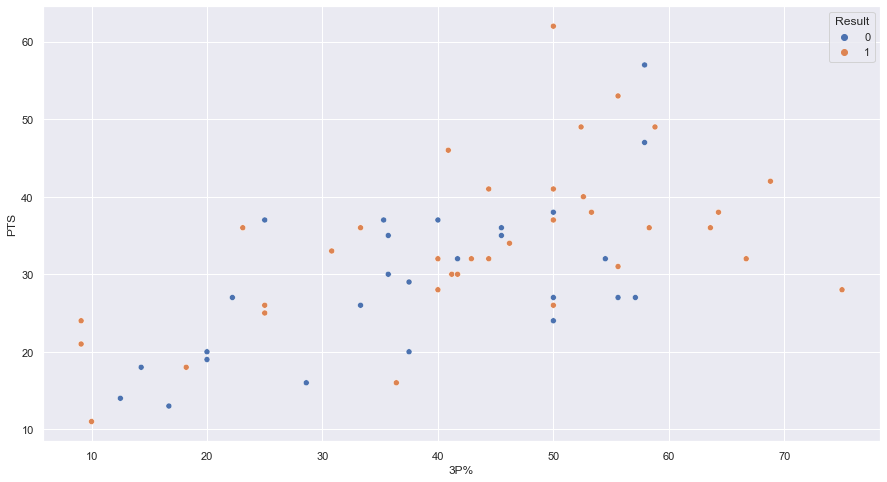

In [3]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=twentyone, x='3P%', y='PTS', hue='Result');

<AxesSubplot:xlabel='FGM', ylabel='PTS'>

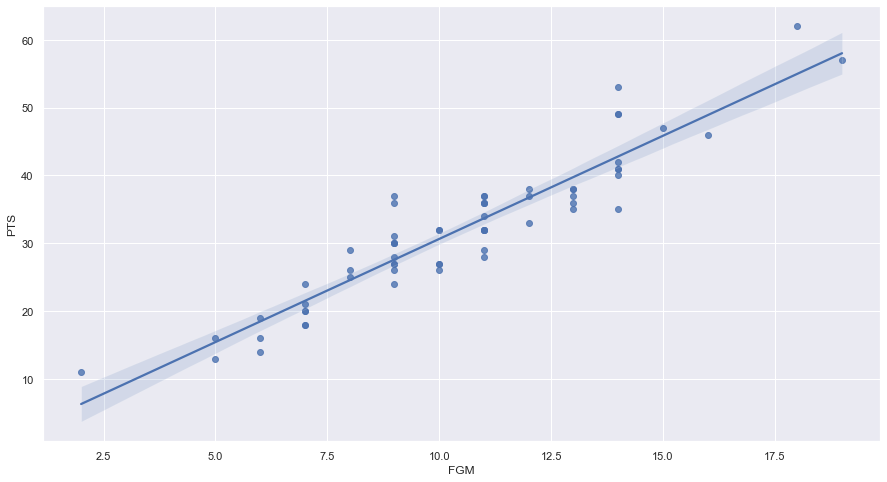

In [4]:
sns.regplot(x='FGM', y='PTS', data=twentyone)

In [5]:
twentyone_numeric = twentyone.drop(labels=['Season_year','Season_div', 'Date','OPP', 'FG','3PT', 'FT','Result'],axis=1)
twentyone_numeric

,T Score,O Score,MIN,FGM,FGA,FG%,3PTM,3PTA,3P%,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
698,113,101,40.0,16,36,44.4,9,22,40.9,5,6,83.3,7,9,1,1,2,7,46
699,122,116,37.0,7,22,31.8,1,11,9.1,6,6,100.0,3,6,0,1,2,3,21
700,119,116,37.0,11,25,44.0,3,13,23.1,11,12,91.7,4,6,0,2,1,3,36
701,136,97,29.0,14,26,53.8,11,21,52.4,10,10,100.0,5,2,0,1,2,1,49
702,118,97,31.0,11,21,52.4,6,13,46.2,6,7,85.7,4,7,0,1,2,3,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,98,123,34.0,9,20,45.0,4,12,33.3,4,4,100.0,8,5,0,0,1,1,26
757,116,106,35.0,9,17,52.9,5,9,55.6,8,8,100.0,5,6,0,2,5,8,31
758,129,128,36.0,11,25,44.0,5,15,33.3,9,9,100.0,2,6,2,2,1,4,36
759,99,138,29.0,6,17,35.3,2,10,20.0,5,5,100.0,4,6,0,1,2,2,19


In [6]:
twentyone_num_normalized = (twentyone_numeric - twentyone_numeric.mean()) / twentyone_numeric.std()
twentyone_num_normalized['Result'] = w_l_converted
twentyone_num_normalized

,T Score,O Score,MIN,FGM,FGA,FG%,3PTM,3PTA,3P%,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS,Result
698,-0.158740,-0.940477,1.667932,1.743437,3.092366,-0.340786,1.322715,2.406822,-0.017540,-0.208216,-0.071608,-0.248316,0.622332,1.371849,2.074126,-0.204952,0.097680,1.917496,1.349991,1
699,0.567111,0.353192,0.811304,-1.080931,0.071915,-1.488988,-1.575756,-0.444336,-2.025520,0.070882,-0.071608,0.551602,-1.011289,0.100871,-0.301691,-0.204952,0.097680,-0.201842,-1.057977,1
700,0.325161,0.353192,0.811304,0.174344,0.719155,-0.377237,-0.851138,0.074056,-1.141503,1.466372,1.520615,0.154038,-0.602884,0.100871,-0.301691,0.717333,-0.781441,-0.201842,0.386804,1
701,1.696214,-1.285455,-1.473038,1.115800,0.934901,0.515808,2.047332,2.147626,0.708616,1.187274,0.989874,0.551602,-0.194479,-1.593766,-0.301691,-0.204952,0.097680,-1.261510,1.638947,1
702,0.244511,-1.285455,-0.901953,0.174344,-0.143831,0.388230,0.235788,0.074056,0.317123,0.070882,0.193763,-0.133358,-0.602884,0.524531,-0.301691,-0.204952,0.097680,-0.201842,0.194166,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,-1.368493,0.956904,-0.045324,-0.453294,-0.359577,-0.286110,-0.488829,-0.185140,-0.497435,-0.487314,-0.602349,0.551602,1.030737,-0.322788,-0.301691,-1.127237,-0.781441,-1.261510,-0.576383,0
757,0.083210,-0.509254,0.240219,-0.453294,-1.006817,0.433794,-0.126521,-0.962729,0.910677,0.629078,0.459133,0.551602,-0.194479,0.100871,-0.301691,0.717333,2.735042,2.447330,-0.094790,1
758,1.131663,1.388127,0.525761,0.174344,0.719155,-0.377237,-0.126521,0.592448,-0.497435,0.908176,0.724504,0.551602,-1.419694,0.100871,4.449944,0.717333,-0.781441,0.327993,0.386804,1
759,-1.287842,2.250573,-1.473038,-1.394750,-1.006817,-1.170043,-1.213447,-0.703533,-1.337250,-0.208216,-0.336978,0.551602,-0.602884,0.100871,-0.301691,-0.204952,0.097680,-0.731676,-1.250614,0


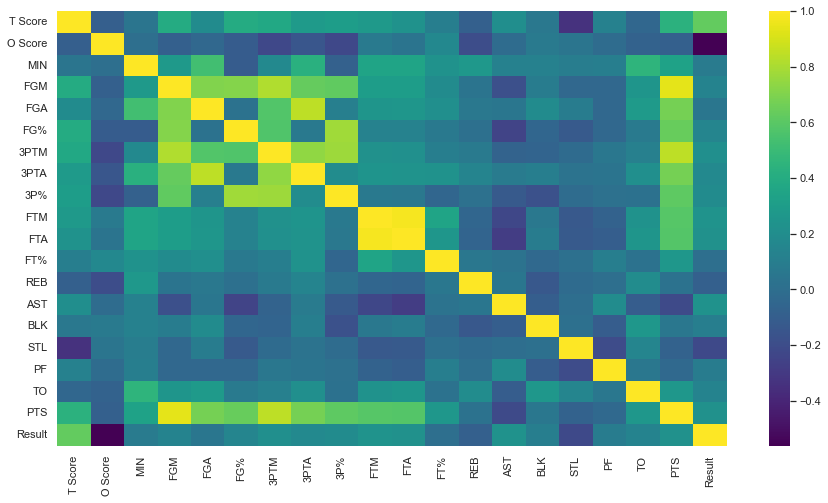

In [7]:
correlation = twentyone_num_normalized.corr()
sns.heatmap(correlation, cmap='viridis');

In [8]:
post_szn = pd.read_csv("./stephdata/Stephen_Curry_Postseason_Stats.csv").drop(labels='Season_div', axis=1)
post_szn_w_l_converted = post_szn['Result'].eq('W').mul(1)
post_szn['Result'] = post_szn_w_l_converted
post_szn.sort_values(by='3P%', ascending=False)


,Season_year,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,FGA,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
107,2018-2019,Wed 4/24,LAC,0,121,129,38.0,7-15,7,15,...,6,6,100.0,3,4,1,0,2,3,24
27,2014-2015,Sat 5/23,HOU,1,115,80,35.0,12-19,12,19,...,9,10,90.0,5,7,1,2,2,4,40
36,2014-2015,Sat 4/25,NOP,1,109,98,38.0,11-20,11,20,...,11,12,91.7,8,9,0,1,4,5,39
57,2015-2016,Sat 4/16,HOU,1,104,78,20.0,8-13,8,13,...,3,3,100.0,7,2,0,3,0,4,24
111,2018-2019,Sat 4/13,LAC,1,121,104,37.0,11-16,11,16,...,8,9,88.9,15,7,1,0,4,4,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2015-2016,Sun 4/24,HOU,1,121,94,19.0,2-9,2,9,...,1,1,100.0,0,5,0,1,0,5,6
23,2014-2015,Sun 6/7,CLE,0,93,95,42.0,5-23,5,23,...,7,8,87.5,6,5,0,0,4,6,19
84,2017-2018,Wed 5/16,HOU,0,105,127,34.0,7-19,7,19,...,1,1,100.0,7,7,0,0,3,2,16
108,2018-2019,Sun 4/21,LAC,1,113,105,35.0,3-14,3,14,...,5,5,100.0,10,7,0,3,4,3,12


<AxesSubplot:>

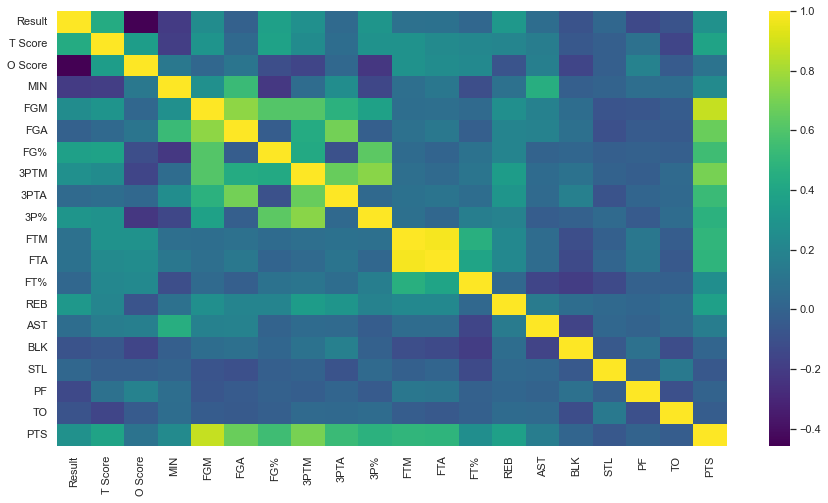

In [14]:
post_szn_numeric = post_szn.select_dtypes([np.number])
post_szn_numeric_normalized = (post_szn_numeric - post_szn_numeric.mean()) / post_szn_numeric.std()
sns.heatmap(post_szn_numeric_normalized.corr(), cmap='viridis')
    